In [1]:
%%html
<style>
.container {
    width: 90%; /* Adjust the width as per your preference */
}
</style>

In [2]:
FIG_SIZE=(10,8)

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import kejla_utils as ku
from sklearn.cluster import KMeans

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data = pd.read_csv('../data/spending_kaggle_stazeno_2_lekce.csv')
data

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [5]:
ku.get_nullness_and_uniqueness(data)

col_names  null_counts  uniqueness
0              CustomerID          0.0       1.000
1                  Gender          0.0       0.010
2                     Age          0.0       0.255
3      Annual Income (k$)          0.0       0.320
4  Spending Score (1-100)          0.0       0.420

In [6]:
ku.plot_corhmap(data)

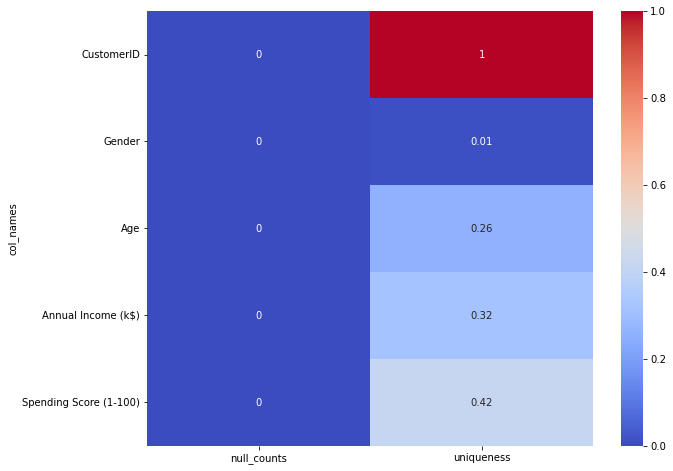

In [7]:
ku.plot_nullness_and_uniqueness(data, only_null=False)

<Figure size 720x576 with 0 Axes>

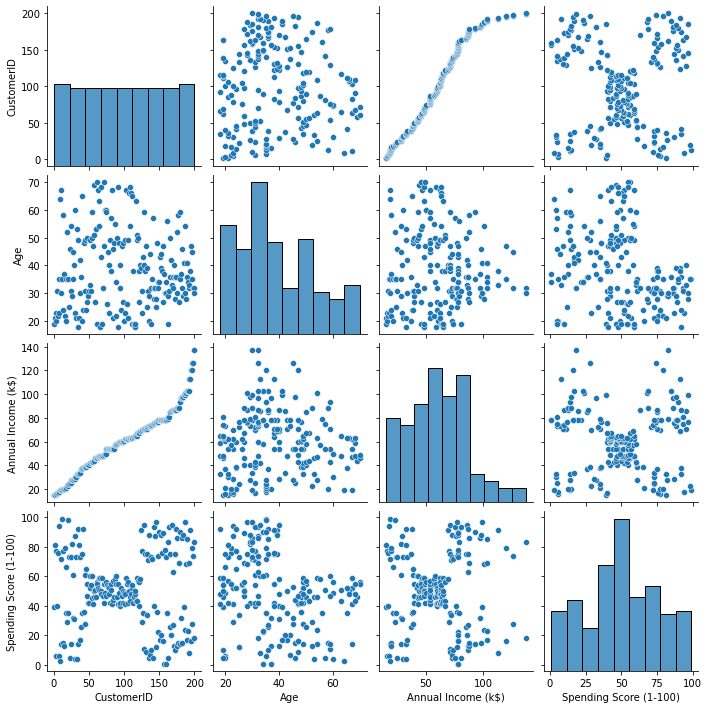

In [8]:
plt.figure(figsize=FIG_SIZE)
sns.pairplot(data)
plt.show()

In [9]:
plt.figure(figsize=FIG_SIZE)
sns.scatterplot(data = data, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans

KMeans(n_clusters=5, random_state=42)

In [11]:
data['Cluster'] = kmeans.fit_predict(data[['Annual Income (k$)','Spending Score (1-100)']])

In [12]:
plt.figure(figsize=FIG_SIZE)
sns.scatterplot(data=data, x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data["Cluster"], legend=True)
plt.show()

In [13]:
def plot_k_means(df: pd.core.frame.DataFrame, colnames_list: list[str], N_clusters = 5, seed = 42)-> None:
    DF_to_be_changed = df.copy()
    DF_to_be_changed["ClusterID"] = KMeans(n_clusters = N_clusters, random_state = seed).fit_predict(DF_to_be_changed[colnames_list])
    plt.figure(figsize=FIG_SIZE)
    sns.scatterplot(data=DF_to_be_changed, x=DF_to_be_changed[colnames_list[0]], y=DF_to_be_changed[colnames_list[1]], hue=DF_to_be_changed["ClusterID"])
    plt.show()

This is 1 clusters:


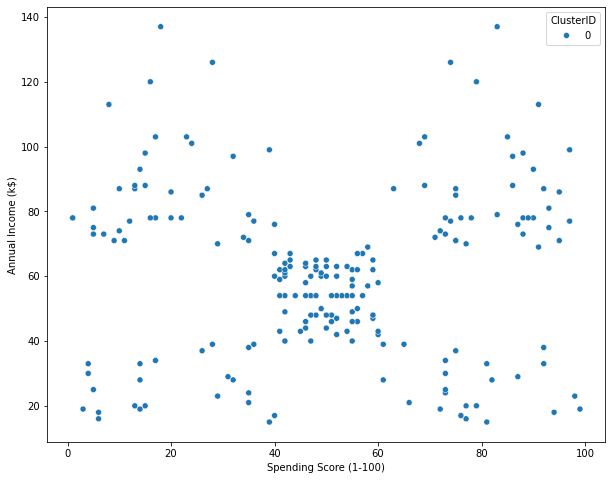

This is 2 clusters:


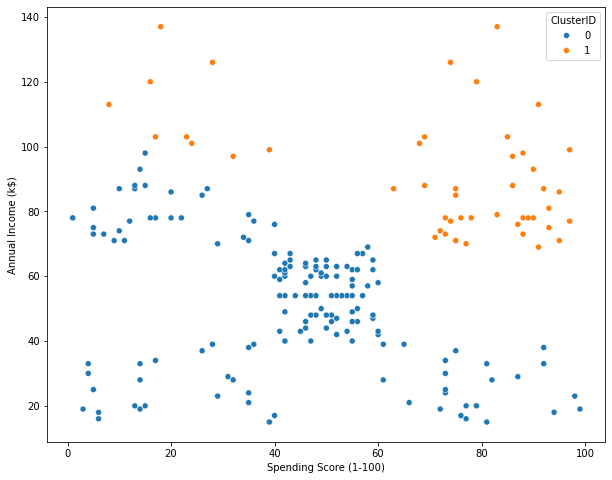

This is 3 clusters:


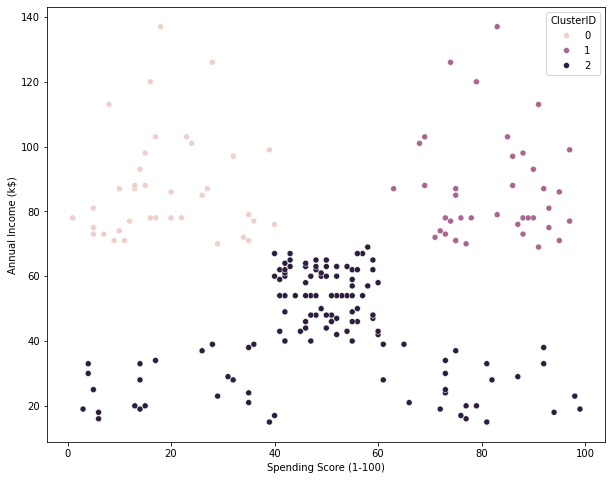

This is 4 clusters:


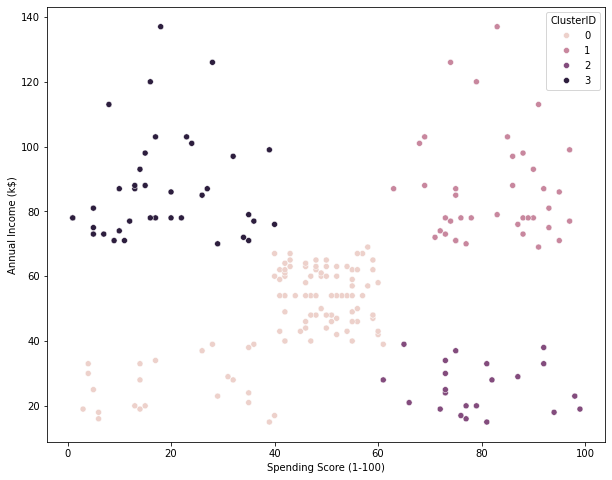

This is 5 clusters:


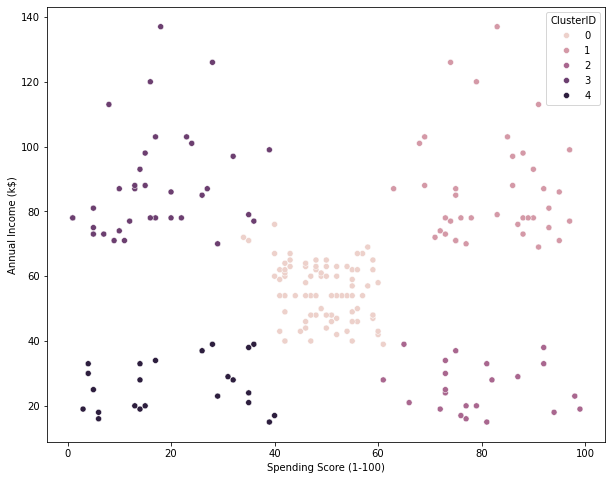

This is 6 clusters:


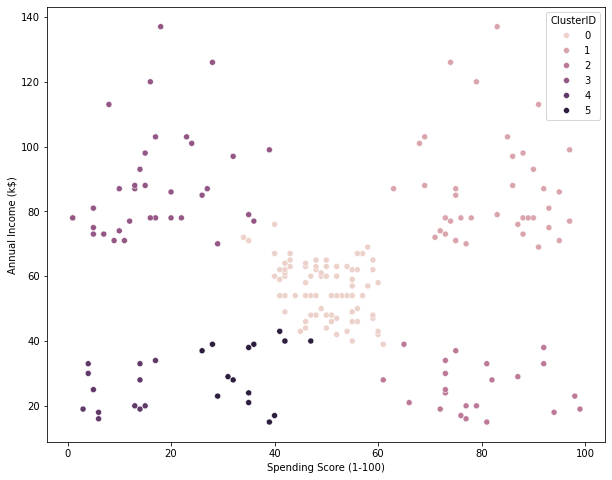

This is 7 clusters:


This is 8 clusters:


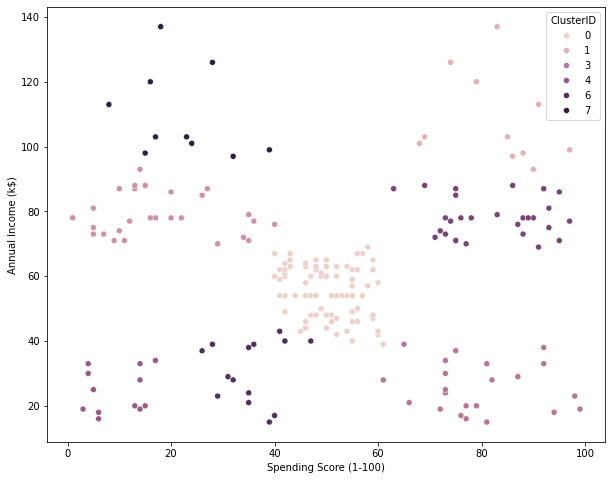

In [14]:
for i in range (8):
    print(f"This is {i+1} clusters:")
    plot_k_means(data, ["Spending Score (1-100)","Annual Income (k$)"], N_clusters=i+1)

In [15]:
from ipywidgets import interact
from ipywidgets import IntSlider
from ipywidgets import widgets


def plot_k_means(df: pd.core.frame.DataFrame, colnames_list: list[str], N_clusters = 5, seed = 42)-> None:
    DF_to_be_changed = df.copy()
    DF_to_be_changed["ClusterID"] = KMeans(n_clusters = N_clusters, random_state = seed).fit_predict(DF_to_be_changed[colnames_list])
    plt.figure(figsize=FIG_SIZE)
    sns.scatterplot(data=DF_to_be_changed, x=DF_to_be_changed[colnames_list[0]], y=DF_to_be_changed[colnames_list[1]], hue=DF_to_be_changed["ClusterID"])
    plt.show()


n_clusters = IntSlider(5,1,8,1, description="Number of clusters")
display(n_clusters)

features = ["Spending Score (1-100)","Annual Income (k$)"]

# Use interact to bind the function and the slider
interact(plot_k_means, data=widgets.fixed(data), features=widgets.fixed(features), N_clusters=n_clusters)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


ValueError: <class 'pandas.core.frame.DataFrame'> cannot be transformed to a widget

In [19]:
def plot_k_means(df: pd.core.frame.DataFrame, colnames_list: list[str], N_clusters = 5, seed = 42)-> None:
    DF_to_be_changed = df.copy()
    DF_to_be_changed["ClusterID"] = KMeans(n_clusters = N_clusters, random_state = seed).fit_predict(DF_to_be_changed[colnames_list])
    plt.figure(figsize=FIG_SIZE)
    sns.scatterplot(data=DF_to_be_changed, x=DF_to_be_changed[colnames_list[0]], y=DF_to_be_changed[colnames_list[1]], hue=DF_to_be_changed["ClusterID"])
    plt.show()

features = ["Spending Score (1-100)", "Annual Income (k$)"]

# Create a slider for selecting the number of clusters
n_clusters = IntSlider(min=1, max=8, step=1, value=5, description="Number of clusters")

seed = IntSlider(min=1, max=100, step=1, value=42)

# Use interact to bind the function and the slider
interact(plot_k_means, df=widgets.fixed(data), colnames_list=widgets.fixed(features), N_clusters=n_clusters, seed=seed)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


<function __main__.plot_k_means(df: pandas.core.frame.DataFrame, colnames_list: list[str], N_clusters=5, seed=42) -> None>